# Linear Regression Single Variable

Following from "Machine Learning Tutorial Python," YouTube video by codebasics, [click here to view](https://youtu.be/8jazNUpO3lQ). Finding the square error function to predict house prices.

This notebook and work is not taken directly from the video. Differences:
* My own csv from researching housing prices in my neighborhood
* Adding slope function
* Creating dataframe for homes to predict (instead of csv)

Data taken from housing prices in my area, retrieved from Zillow on 12/9/2021.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model 

In [2]:
df = pd.read_csv("home_prices.csv")
df

,sell_date,price_k,sqft,bed,bath,lot,year,garage_cars
0,12/3/2021,447,3395,4,4,0.35,1997,2
1,12/3/2021,365,2750,3,4,0.25,1992,2
2,12/1/2021,450,2891,3,3,0.16,2017,2
3,11/29/2021,235,1392,2,1,0.20,1947,2
4,11/29/2021,145,1094,3,1,0.24,1921,0
5,11/15/2021,262,2068,3,2,0.23,1955,0
6,11/12/2021,444,3016,5,3,0.21,2019,2


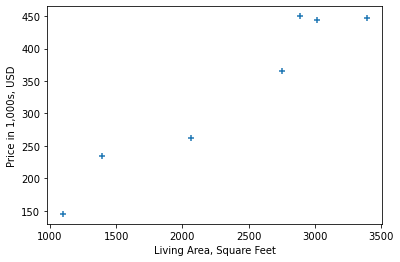

In [3]:
# Plot the square footage and selling price

%matplotlib inline

plt.xlabel('Living Area, Square Feet')
plt.ylabel('Price in 1,000s, USD')
plt.scatter(df.sqft, df.price_k, marker="+")

In [4]:
#Built in L.R. method
reg = linear_model.LinearRegression()

reg.fit(df[['sqft']], df.price_k)

LinearRegression()

In [5]:
# Predict home price if square feet = 3300
reg.predict([[3300]])

array([461.33346816])

In [6]:
# Slope y = mx + b
# This model can predict coefficient m and intercept b

print(reg.coef_)  # array
print(reg.intercept_)

[0.13571516]
13.47342588804429


In [7]:
# Make function to complete slope

def slope(area):
    m = reg.predict([[area]])
    x = reg.coef_
    b = reg.intercept_
    return((m * x) + b) 

In [8]:
# Test 1
slope(3300)

array([76.08337333])

In [9]:
# Test 2
slope(2500)

array([61.34848867])

In [10]:
# New df of house square footage that we want to predit price for

d = {'area': [900, 1200, 1500, 1750, 2000, 2500, 3000, 3500, 4000, 4500, 5000]}
df2 = pd.DataFrame(data=d)
df2

,area
0,900
1,1200
2,1500
3,1750
4,2000
5,2500
6,3000
7,3500
8,4000
9,4500


In [20]:
prices = reg.predict(np.array(df2))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)

In [19]:
prices

NameError: name 'prices' is not defined

In [18]:
df2['est_price_in_k'] = prices
df2

,area,prices,est_price_in_k
0,900,135.617074,135.617074
1,1200,176.331623,176.331623
2,1500,217.046172,217.046172
3,1750,250.974963,250.974963
4,2000,284.903755,284.903755
5,2500,352.761337,352.761337
6,3000,420.618919,420.618919
7,3500,488.476501,488.476501
8,4000,556.334083,556.334083
9,4500,624.191665,624.191665
